# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1) 

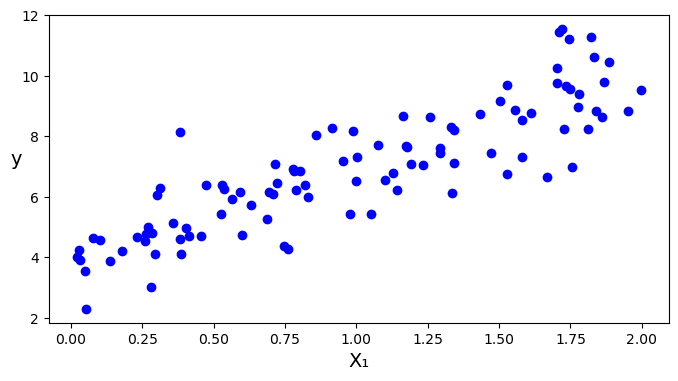

In [3]:
plt.figure(figsize=(8,4))
plt.xlabel('X₁', fontsize=14)
plt.ylabel('y', fontsize=14, rotation='horizontal')

plt.plot(X, y, 'bo')
plt.show()

## Using the normal equation

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

## We use the function y = 3x + 4 + gaussian noise. The equation finds:

In [5]:
theta_best

array([[3.89919133],
       [3.050309  ]])

### we expected $\theta_ 0$ = 4 and $\theta_ 1$ = 3 It came close, but the Gaussian noise made it impossible to recover the exact parameters of the original function

## Now we go do some predicitions with the normal equation

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)

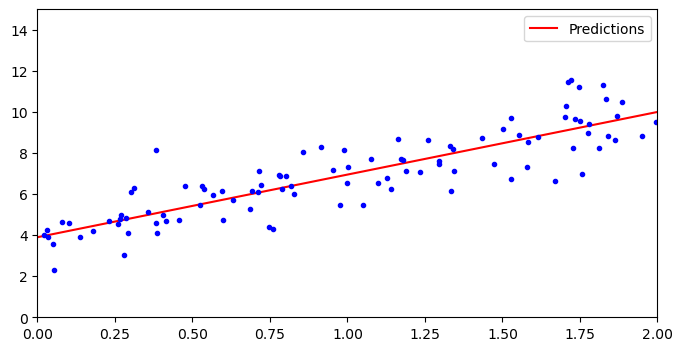

In [8]:
plt.figure(figsize=(8, 4))

plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, "b.")

plt.axis([0, 2, 0, 15])

plt.legend()
plt.show()

## linear regression with Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.89919133]), array([[3.050309]]))

In [11]:
lin_reg.predict(X_new)

array([[3.89919133],
       [9.99980934]])

## LinearRegression is based in the function scipy.linalg.lstsq() Least squares you can call it directly

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [13]:
theta_best_svd

array([[3.89919133],
       [3.050309  ]])

## You can use np.linalg.pinv() to calculate the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) directly

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[3.89919133],
       [3.050309  ]])

## Gradient Descent (batch)

In [15]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[3.89919133],
       [3.050309  ]])

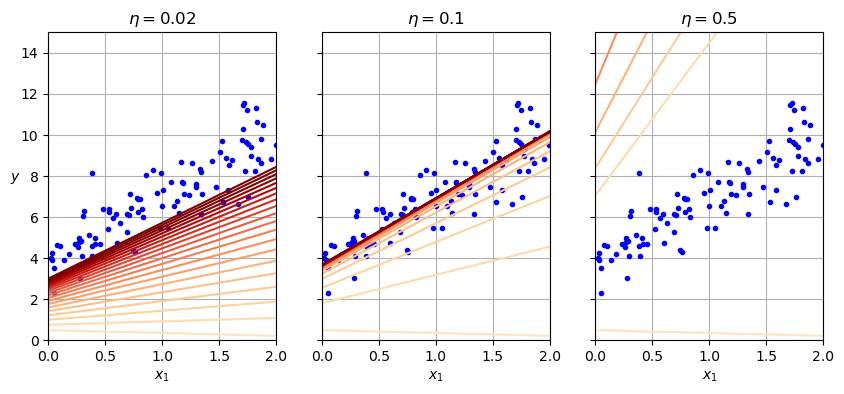

In [17]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent

In [18]:
n_epochs = 50

t0, t1 = 5, 50 # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [19]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [20]:
theta

array([[3.87934235],
       [3.03562124]])

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D target

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.8986461]), array([3.0505368]))

## Stochastic Gradient Descent

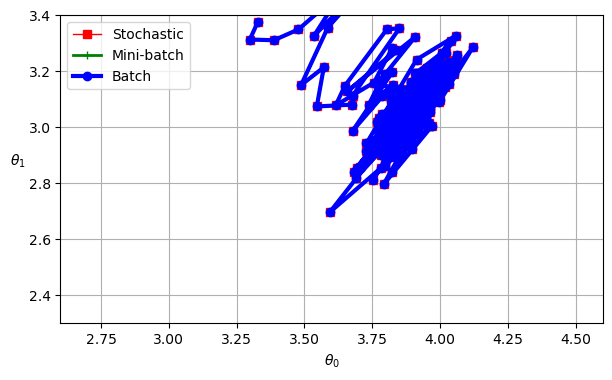

In [26]:
from math import ceil
import numpy as np
import matplotlib.pyplot as plt

# Assuming m, X_b, and y are defined before this code snippet

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
theta_path_sgd = []  # Initialize theta_path_sgd
theta_path_bgd = []  # Initialize theta_path_bgd

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        theta_path_sgd.append(theta)  # Append theta for SGD
        theta_path_bgd.append(theta)  # Append theta for BGD

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)  # Fix the variable name
theta_path_mgd = np.array(theta_path_mgd)

# The rest of your plotting code remains unchanged
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()